# <span style='font-family:Calibri'> Loan Approval Classification  : Data Analysis
  </span> 

---

# <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> Predicting Insurance Charges: Exploratory Data Analysis (EDA)

## <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> Overview
This exploratory data analysis (EDA) aims to investigate factors influencing insurance charges. The analysis covers:

- Univariate Analysis: Studying individual variables.
- Bivariate Analysis: Analyzing relationships between pairs of variables.
- Data Preprocessing: Preparing data for modeling.
- Visualization: Employing Matplotlib and Plotly for interactive insights.

## <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  Table of Contents
1. Introduction
2. Dataset Overview
3. Univariate Analysis
4. Bivariate Analysis
5. Conclusions

# <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  1. Introduction

The dataset contains information on SBA loans, with predictors such as:
* **Demographics** (business age, region, industry sector).
* **Financial indicators** (loan amount, debt-to-income ratio).
* **Loan details** (term, collateral, loan status).

This analysis will explore trends and relationships that impact the approval or denial of SBA loans.


# <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  2. Dataset Overview

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> **Variables**

| Variable Name      | Description |
|--------------------|-------------|
| LoanNr_ChkDgt     | Identifier Primary key |
| Name              | Borrower name |
| City              | Borrower city |
| State             | Borrower state |
| Zip               | Borrower zip code |
| Bank              | Bank name |
| BankState         | Bank state |
| NAICS             | North American Industry Classification System (NAICS) code |
| ApprovalDate      | Date SBA commitment issued |
| ApprovalFY        | Fiscal year of commitment |
| Term             | Loan term in months |
| NoEmp            | Number of business employees |
| NewExist         | 1 = Existing business, 2 = New business |
| CreateJob        | Number of jobs created |
| RetainedJob      | Number of jobs retained |
| FranchiseCode    | Franchise code, (00000 or 00001) = No franchise |
| UrbanRural       | 1 = Urban, 2 = Rural, 0 = Undefined |
| RevLineCr        | Revolving line of credit: Y = Yes, N = No |
| LowDoc           | LowDoc Loan Program: Y = Yes, N = No |
| ChgOffDate       | The date when a loan is declared to be in default |
| DisbursementDate | Disbursement date |
| DisbursementGross | Amount disbursed |
| BalanceGross     | Gross amount outstanding |
| MIS_Status       | Loan status: Charged off = CHGOFF, Paid in full = PIF |
| ChgOffPrinGr     | Charged-off amount |
| GrAppv           | Gross amount of loan approved by bank |
| SBA_Appv         | SBA’s guaranteed amount of approved loan |

## <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 2.1 Importing librairies & Dataset

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 2.1.1 Importing the librairies for Data Analysis

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  2.1.2 Importing the Dataset

In [60]:
# Dictionary for column data types
dtypes_dict = {
    'Name': 'category',
    'City': 'category',
    'State': 'category',
    'Zip': 'category',
    'NAICS_Sectors': 'category',
    'Franchise': 'category',
    'Bank': 'category',
    'BankState': 'category',
    'ApprovalDate': 'datetime64[ns]',
    'ApprovalYear': 'category',
    'ApprovalMonth': 'category',
    'ApprovalFY': 'category',
    'Term': 'int64',
    'GrAppv': 'int64',
    'MIS_Status': 'category',
    'PIF': 'category',
    'CHGOFF': 'category',
    'NoEmp': 'int64',
    'CreateJob': 'int64',
    'RetainedJob': 'int64',
    'RevLineCr': 'category',
    'LowDoc': 'category',
    'New': 'category',
    'Rural': 'category',
    'Crisis_Period': 'category',
    'Crisis': 'category'
}

In [61]:
data = pd.read_parquet('../data/SBAnational_cleaned_Dorothee.parquet', engine='pyarrow')
data = data.astype(dtypes_dict)
df = data.copy()

In [62]:
df.head(3)

,Name,City,State,Zip,NAICS_Sectors,Franchise,Bank,BankState,ApprovalDate,ApprovalYear,ApprovalMonth,ApprovalFY,Term,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,BalanceGross,MIS_Status,PIF,CHGOFF,ChgOffPrinGr,ChgOffDate,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,New,Rural,Crisis_Period,Crisis
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,45,0,FIFTH THIRD BANK,OH,1997-02-28,1997,2,1997,84,1999-02-28,60000,60000,48000,0,P I F,1,0,0,NaT,4,0,0,0.0,1.0,1.0,NaN,NaN,0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,72,0,1ST SOURCE BANK,IN,1997-02-28,1997,2,1997,60,1997-05-31,40000,40000,32000,0,P I F,1,0,0,NaT,2,0,0,0.0,1.0,1.0,NaN,NaN,0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,62,0,GRANT COUNTY STATE BANK,IN,1997-02-28,1997,2,1997,180,1997-12-31,287000,287000,215250,0,P I F,1,0,0,NaT,7,0,0,0.0,0.0,0.0,NaN,NaN,0


In [63]:
# Get general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Name               899150 non-null  category      
 1   City               899134 non-null  category      
 2   State              899150 non-null  category      
 3   Zip                899164 non-null  category      
 4   NAICS_Sectors      697216 non-null  category      
 5   Franchise          899164 non-null  category      
 6   Bank               897605 non-null  category      
 7   BankState          897598 non-null  category      
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalYear       899164 non-null  category      
 10  ApprovalMonth      899164 non-null  category      
 11  ApprovalFY         899164 non-null  category      
 12  Term               899164 non-null  int64         
 13  DisbursementDate   896796 non-null  datetime

# <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 3. Univariate Analysis

This section focuses on exploring individual variables to identify:
- Distributions.
- Outliers.
- Central tendencies.

<span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  **Visualizations:**
- Histograms and boxplots (using Matplotlib/Seaborn/Plotly).

<span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  **Other Univariate Analyses:**
- Distribution of loan terms.
- Breakdown of businesses by sector and region.
- Analysis of debt-to-income ratios.


In [64]:
# Summarize descriptive statistics
numeric_df = df.select_dtypes('number')
numeric_columns = numeric_df.columns
stats = df.select_dtypes('number').describe().round().T
stats['median'] = numeric_df.median()
stats = stats[['count', 'mean', 'median', 'std', 'min', 'max', '25%', '50%', '75%']]
stats

,count,mean,median,std,min,max,25%,50%,75%
Term,899164.0,111.0,84.0,79.0,0.0,569.0,60.0,84.0,120.0
DisbursementGross,899164.0,201154.0,100000.0,287641.0,0.0,11446325.0,42000.0,100000.0,238000.0
GrAppv,899164.0,192687.0,90000.0,283263.0,200.0,5472000.0,35000.0,90000.0,225000.0
SBA_Appv,899164.0,149489.0,61250.0,228415.0,100.0,5472000.0,21250.0,61250.0,175000.0
BalanceGross,899164.0,3.0,0.0,1442.0,0.0,996262.0,0.0,0.0,0.0
ChgOffPrinGr,899164.0,13503.0,0.0,65152.0,0.0,3512596.0,0.0,0.0,0.0
NoEmp,899164.0,11.0,4.0,74.0,0.0,9999.0,2.0,4.0,10.0
CreateJob,899164.0,8.0,0.0,237.0,0.0,8800.0,0.0,0.0,1.0
RetainedJob,899164.0,11.0,1.0,237.0,0.0,9500.0,0.0,1.0,4.0


## <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  3.1 Distribution

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  3.1.1 Numeric variables distribution

In [65]:
def plot_numeric_distributions(df, cols):
    """
    Plots the distribution of all specified numeric variables in the DataFrame using Seaborn.
    """
    num_cols = len(cols)  # Number of columns to plot
    cols_per_row = 3  # Adjust the number of columns per row for layout
    rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(10 * cols_per_row, 6 * rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        # Define bin range based on data quantiles
        lower_limit = df[col].min()
        upper_limit = df[col].quantile(0.99)  # Use 99th percentile to limit extreme values
        sns.histplot(df[col], ax=axes[i], kde=True, bins=20, binrange=(lower_limit, upper_limit), color='#4B0082')

        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        
        # Add bar labels to each container in the plot
        for container in axes[i].containers:
            axes[i].bar_label(container, fmt='%.0f')

        # Dynamically adjust x-axis limits for better readability
        axes[i].set_xlim(lower_limit, upper_limit)

    # Hide any empty subplots if the number of columns is not a perfect multiple of cols_per_row
    for i in range(num_cols, len(axes)):
        axes[i].axis('off')  # Hide axes that don't contain a plot

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


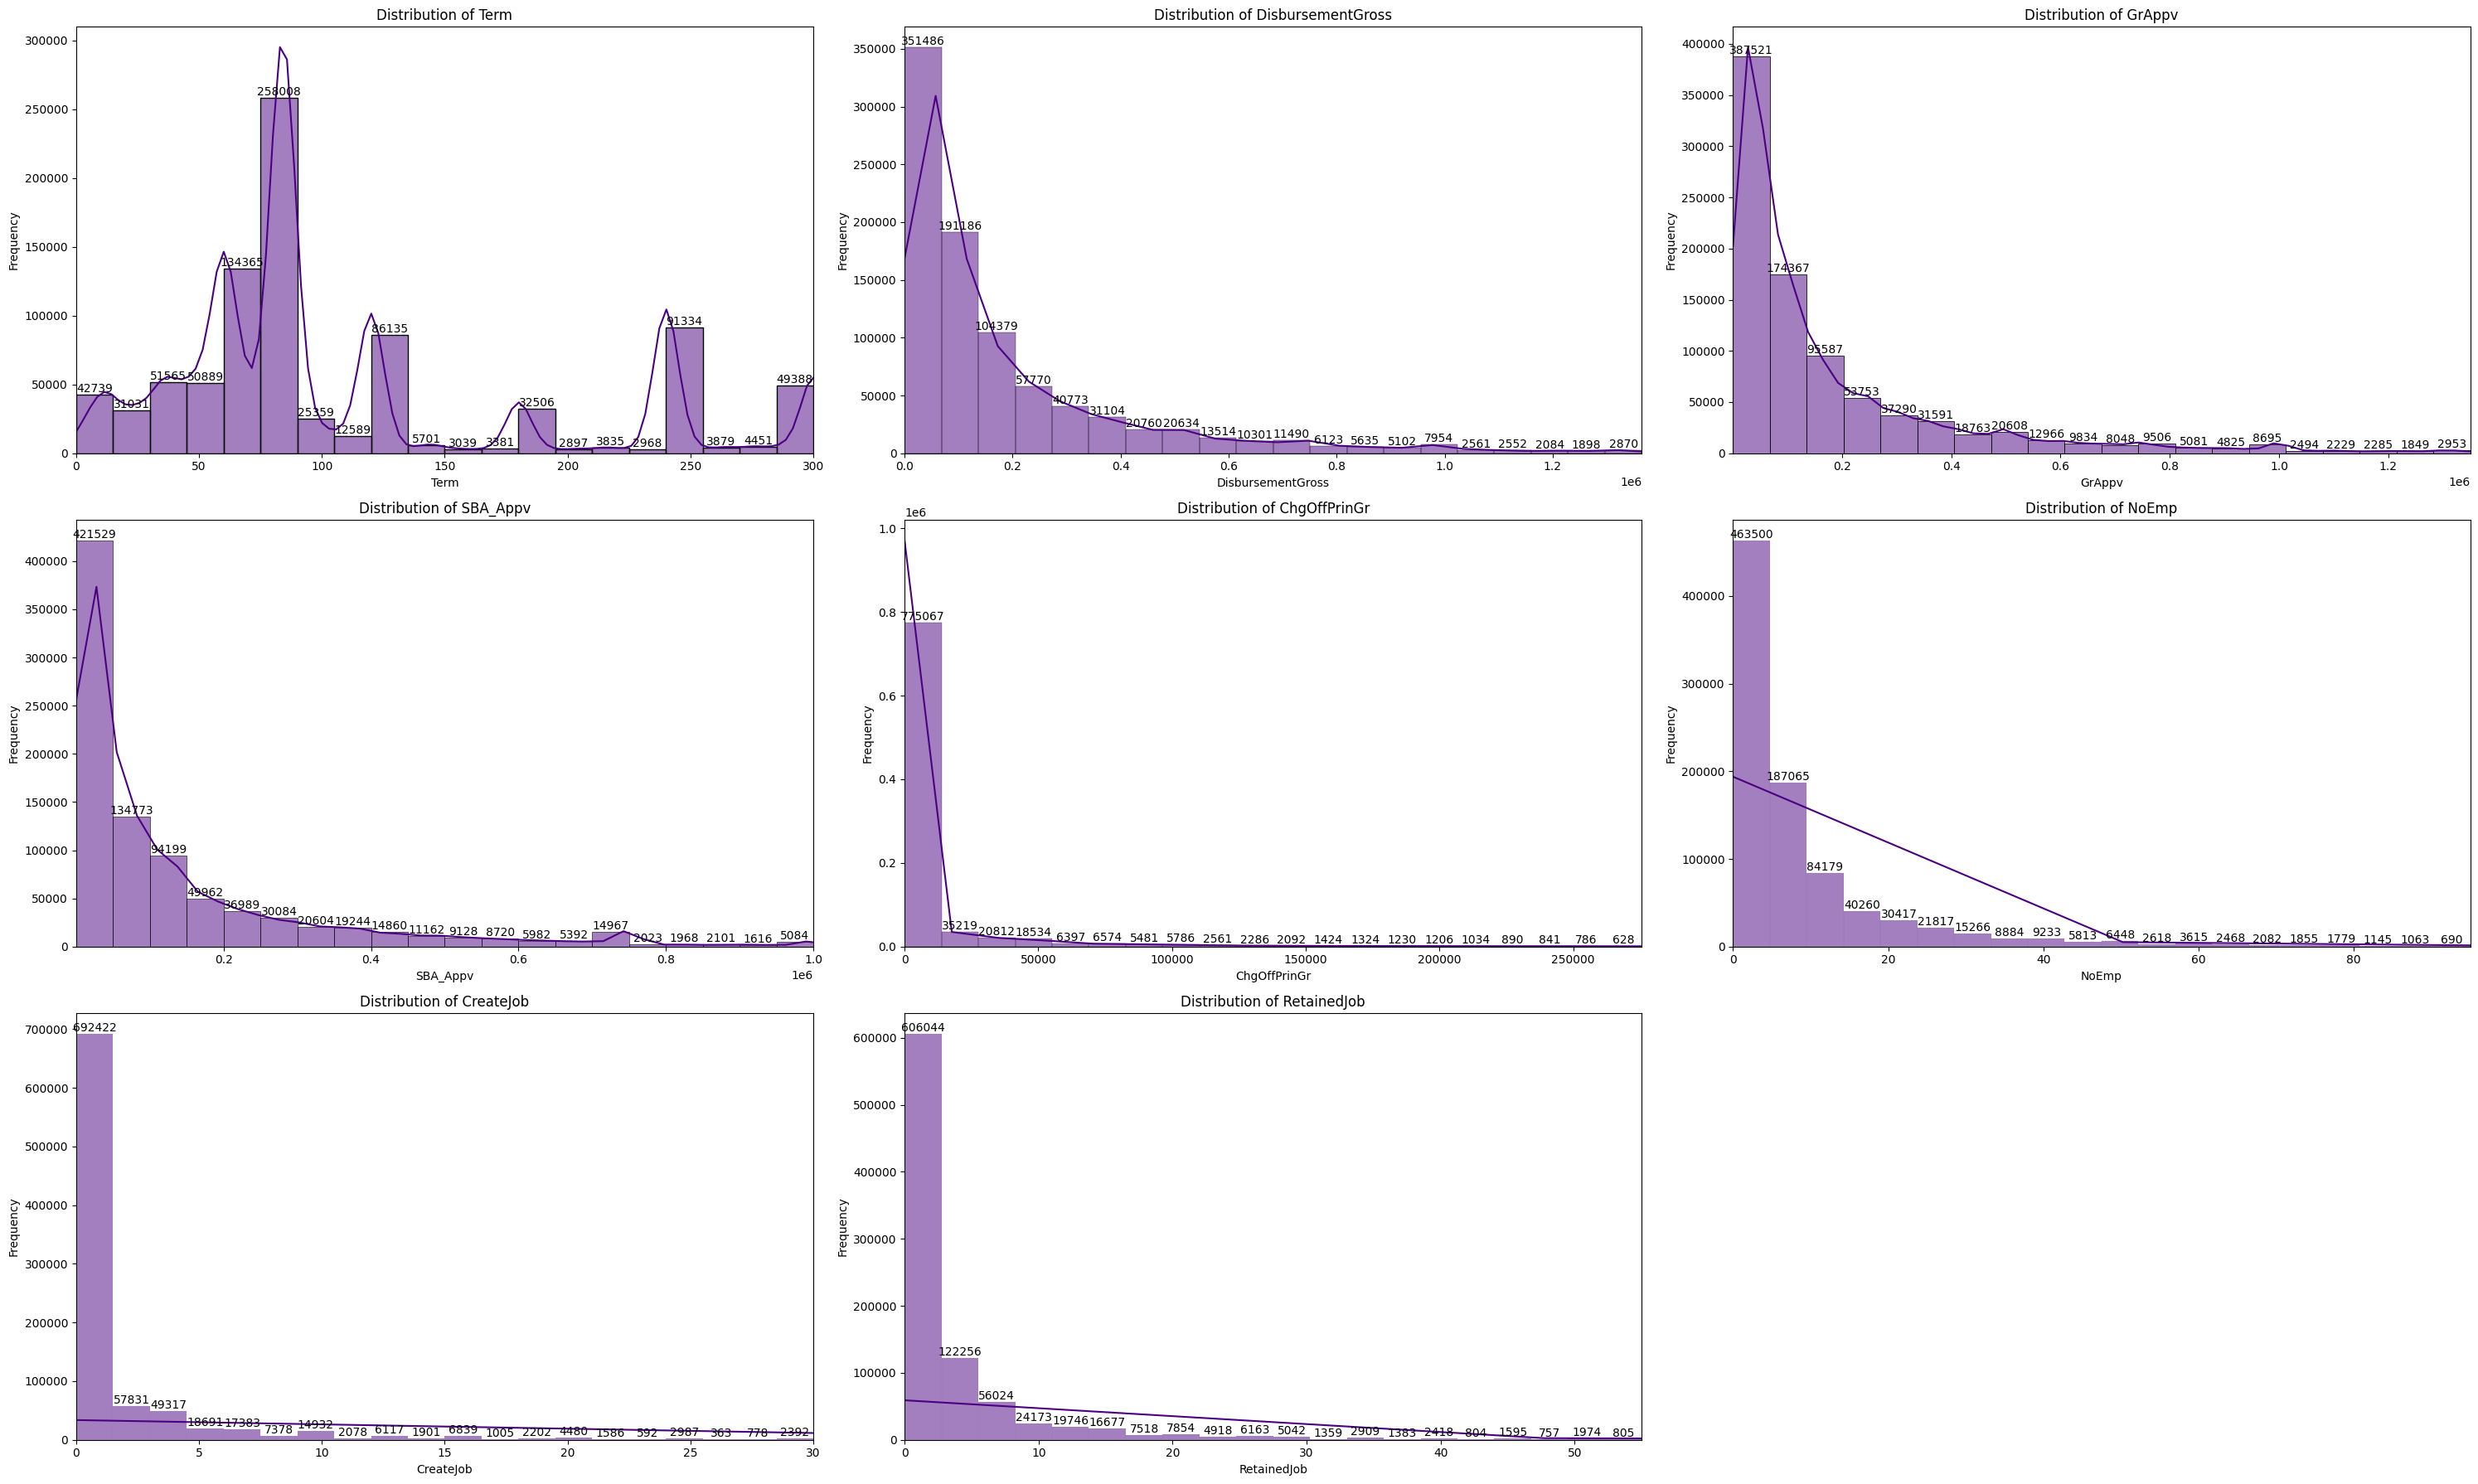

In [66]:
# List of numeric columns
numeric_columns = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv',
                   'ChgOffPrinGr', 'NoEmp', 'CreateJob', 'RetainedJob']

# Plot distributions for the specified numeric columns
plot_numeric_distributions(df, numeric_columns)

In [67]:
def plot_boxplots(df, numerical_vars):
    """
    Plots boxplots for the specified numeric variables in the DataFrame using Seaborn.
    """
    num_cols = len(numerical_vars)  # Number of columns to plot
    cols_per_row = 3  # Adjust the number of columns per row for layout
    rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(8 * cols_per_row, 4 * rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=df, x=var, ax=axes[i], color='#9370DB', flierprops=dict(marker='o', markersize=1))
        axes[i].set_title(f'Boxplot of {var}', fontsize=12)
        axes[i].set_xlabel(var, fontsize=12)
        axes[i].set_ylabel('Value', fontsize=12)
        axes[i].tick_params(axis='both', which='major', labelsize=12)

    # Hide any empty subplots if the number of columns is not a perfect multiple of cols_per_row
    for i in range(num_cols, len(axes)):
        axes[i].axis('off')  # Hide axes that don't contain a plot

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

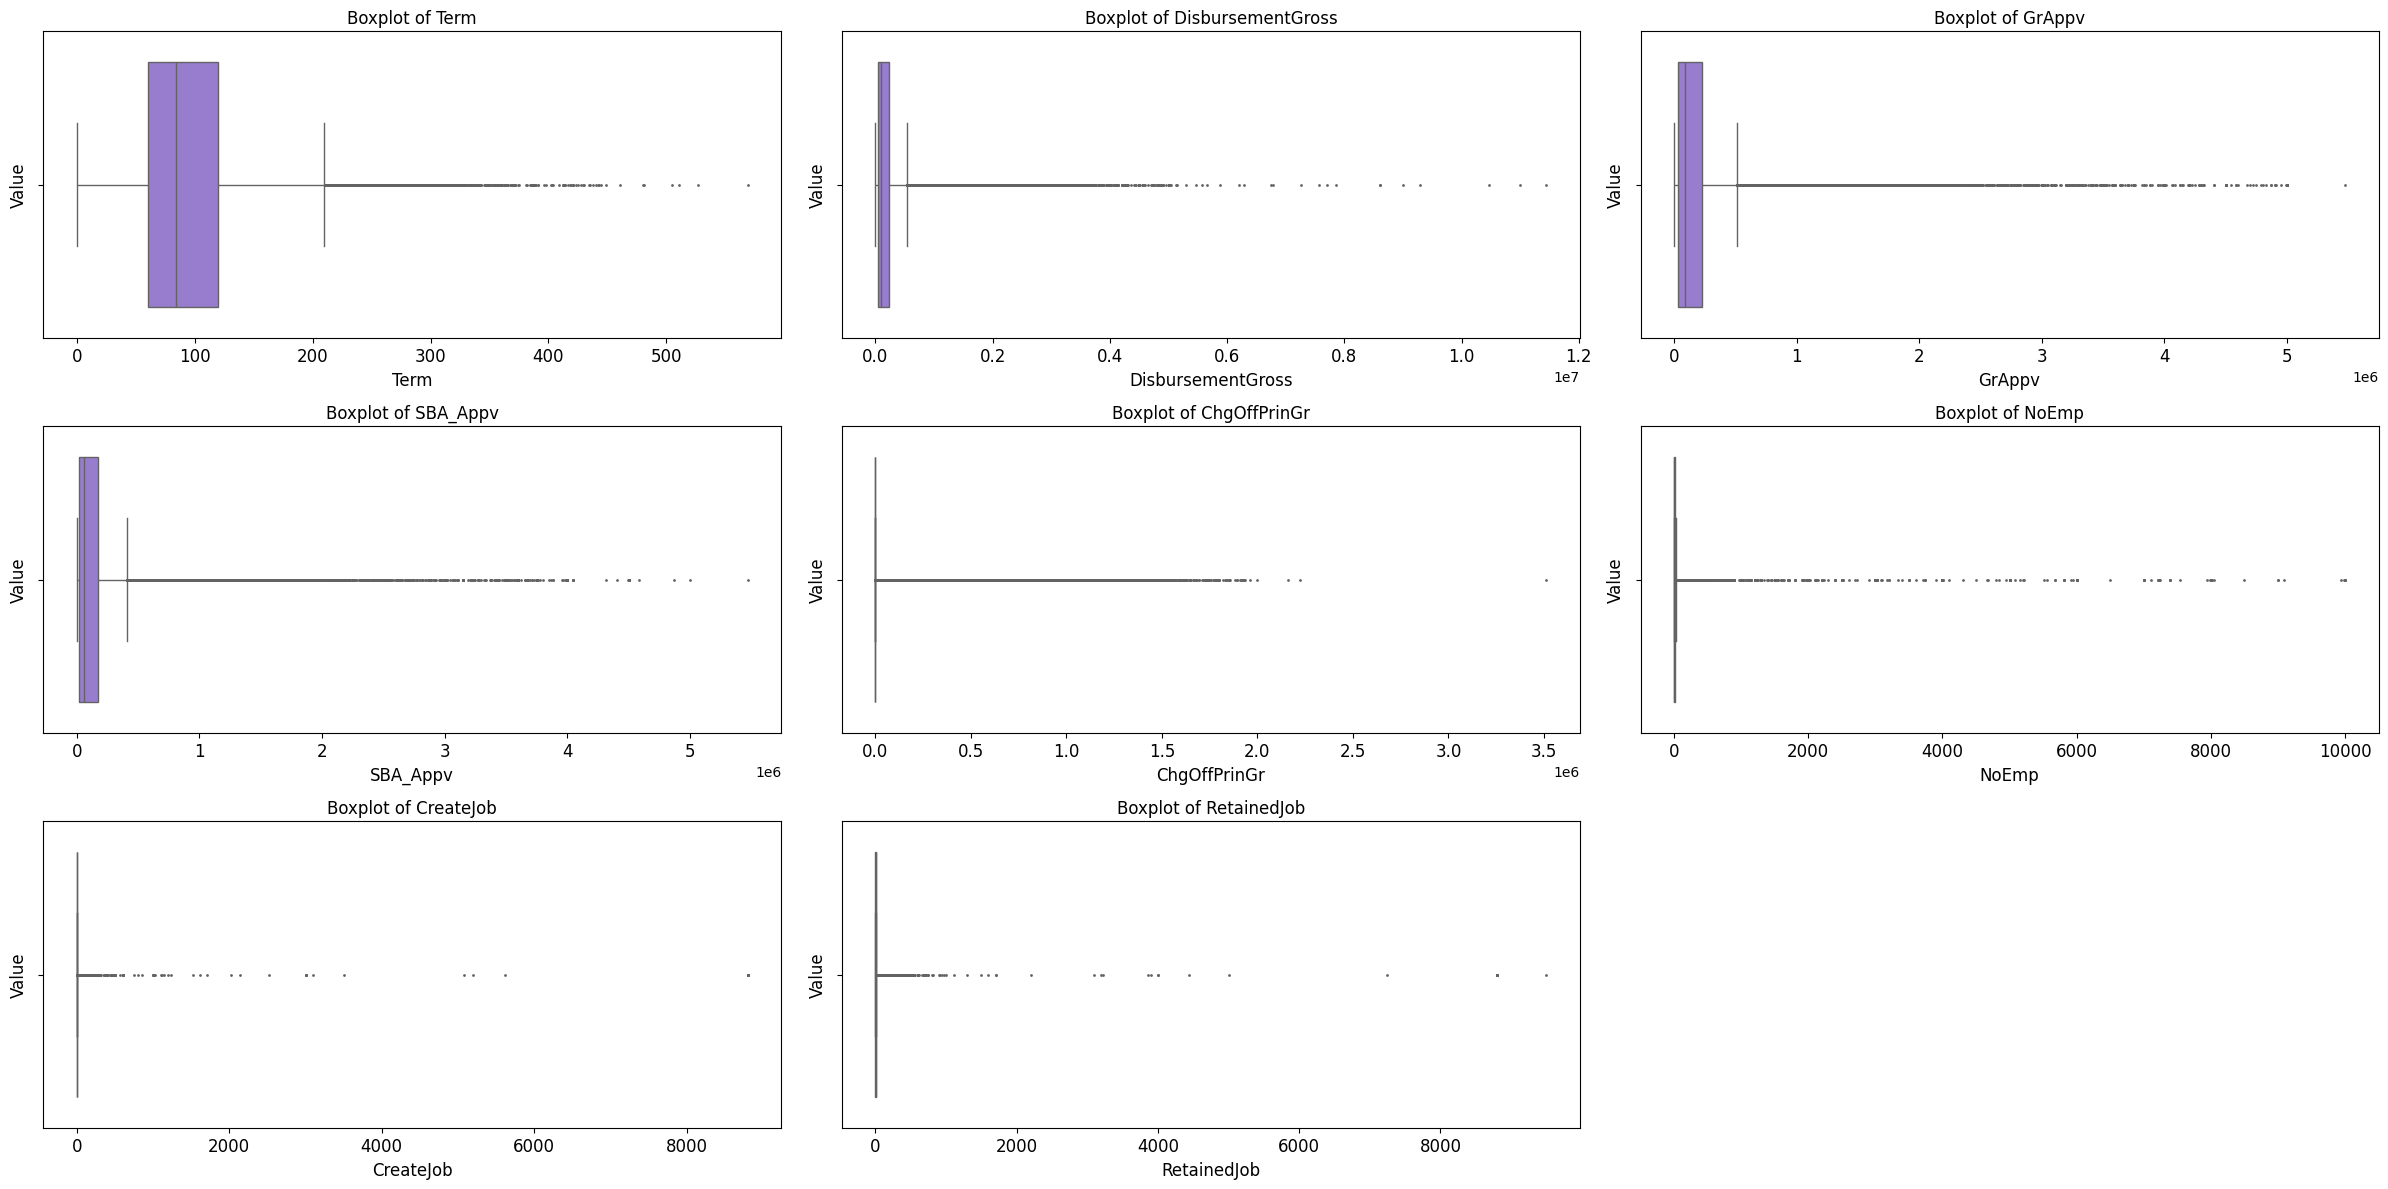

In [68]:
# Plot boxplots for the numeric columns
plot_boxplots(df, numeric_columns)

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  3.1.2 Categorical variable distributions

In [69]:
categorical_columns = df.select_dtypes('category').columns
categorical_columns = ['State', 'NAICS_Sectors', 'Franchise',
       'BankState', 'ApprovalYear', 'ApprovalMonth', 'ApprovalFY',
       'MIS_Status', 'RevLineCr', 'LowDoc', 'New', 'Rural']

In [70]:
def categorical_distribution_graph(df, column):
    """
    Plots the distribution of a specified categorical variable in the DataFrame using Seaborn.
    """
    # Create a table with the count of each category
    count_table = df[column].value_counts().reset_index()
    count_table.columns = [column, 'Count']
    
    # Plot the count table as a bar graph
    plt.figure(figsize=(10, 2))
    sns.barplot(data=count_table, x=column, y='Count', color='#9370DB')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.0f', fontsize=6)
    plt.title(f'Distribution of {column}', fontsize=8)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

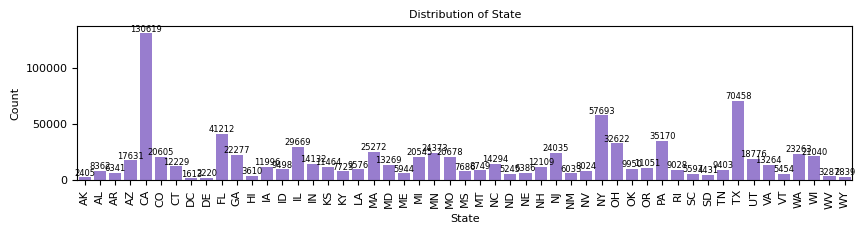

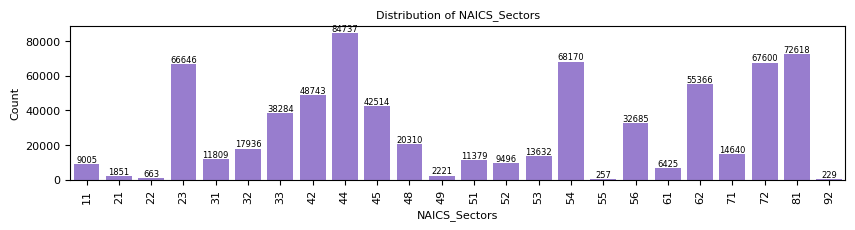

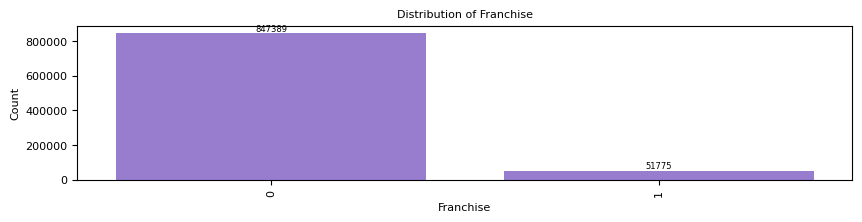

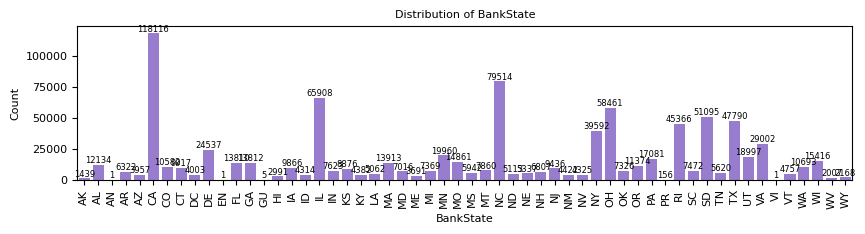

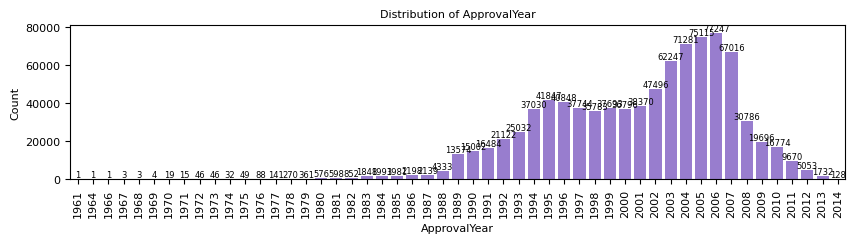

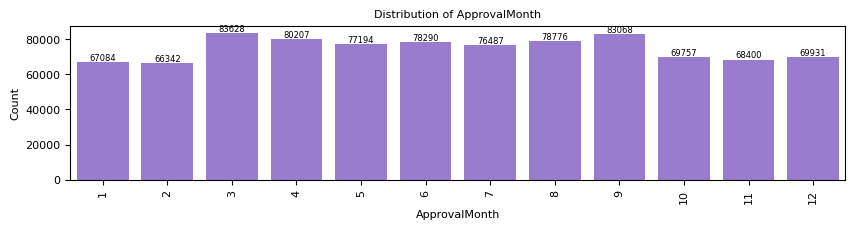

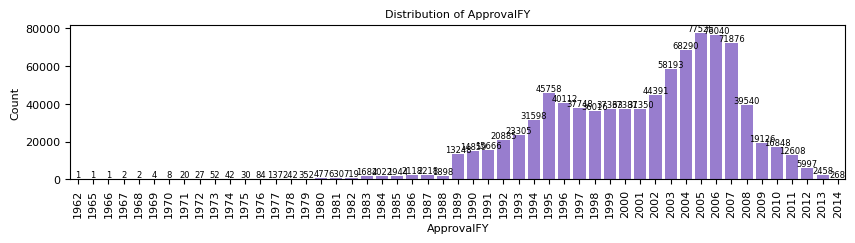

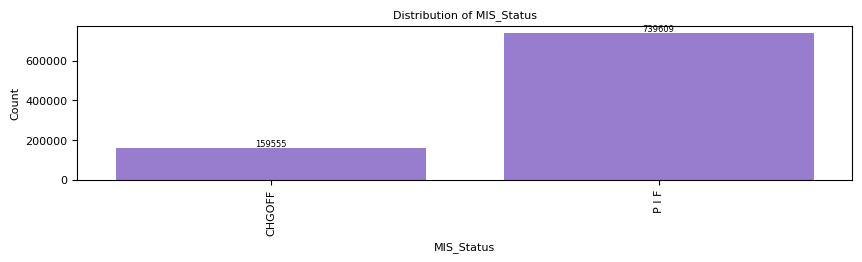

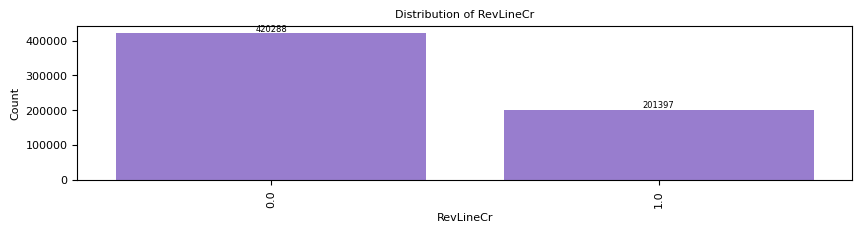

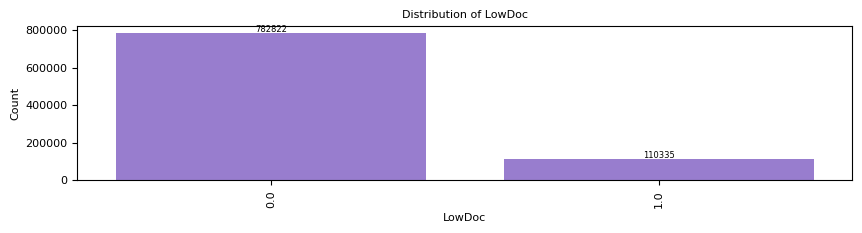

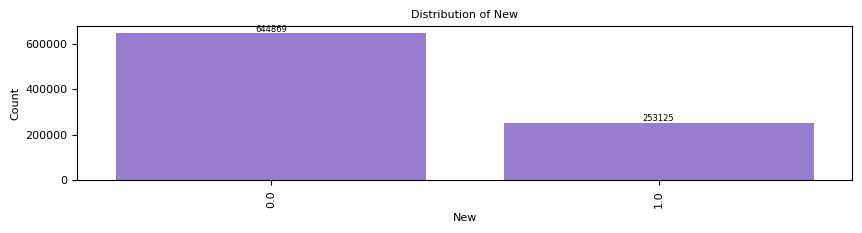

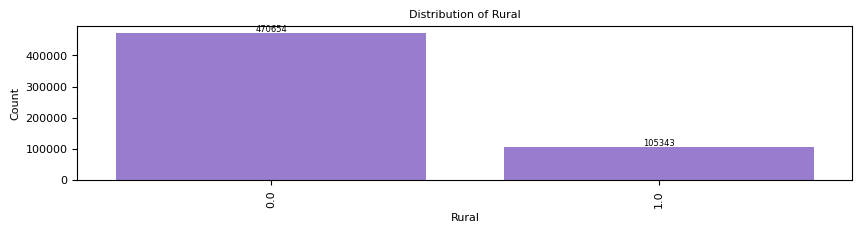

In [71]:
for col in categorical_columns:
    categorical_distribution_graph(df, col)

In [72]:
# Calculate missing value count per column
missing_counts = df.isna().sum()

def plot_missing_values(df):
    """
    Plots the missing values per column in the DataFrame using Seaborn.
    """
    # Calculate missing value count per column
    missing_counts = df.isna().sum()

    if missing_counts.sum() == 0:
        print("There are no missing values to be shown")
    else:
        # Create a dataframe for visualization
        missing_df = pd.DataFrame(missing_counts, columns=["Missing Values"])

        # Sort by highest missing values
        missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values(by="Missing Values", ascending=False)

        # Plot heatmap
        plt.figure(figsize=(10, 3))
        sns.heatmap(missing_df.T, annot=True, cmap="Purples", linewidths=0.5, fmt=".0f", cbar=False)
        plt.title("Missing Values per Column", fontsize=14)
        plt.xlabel("Columns")
        plt.ylabel("")
        plt.xticks(rotation=45)
        plt.show()

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  3.2 Missing values

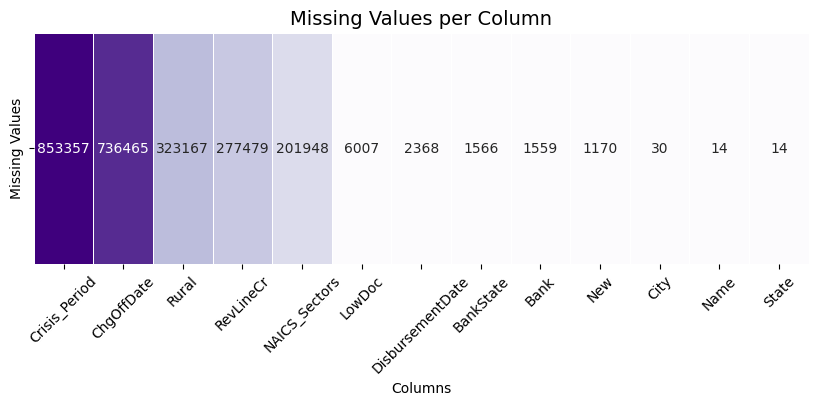

In [73]:
# Plot missing values
plot_missing_values(df)

# <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  4. Bivariate Analysis

Examining relationships between variables to identify factors influencing loan approval.

<span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  **Example Analyses**
- **Relationship between loan amount and loan status**:
  - Higher loan amounts are more likely to be denied.
- **Impact of collateral on loan approval**:
  - Loans with collateral have higher approval rates.
- **Correlation between debt-to-income ratio and loan status**:
  - Higher ratios are associated with increased risk of denial.

<span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'>  **Visualizations:**
- Scatterplots (loan amount vs. loan status).
- Boxplots (loan status by sector or region).
- Heatmaps for correlations between numerical variables.

## <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 4.2. Correlations

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 4.2.1 Analysis of Numerical Variable Correlations

In [74]:
def calculate_correlations(df, numerical_vars):
    """
    Calculate the correlation coefficients, p-values, and interpretations for pairs of numeric variables.
    """

    # Creating an empty list to store correlation coefficients, p-values, and interpretations
    correlation_results = []

    # Calculating the correlation matrix, p-values, and interpretation
    for var1 in numerical_vars:
        for var2 in numerical_vars:
            if var1 != var2:  # Skip the diagonal
                corr, p_value = pearsonr(df[var1], df[var2])

                # Interpretation based on correlation coefficient
                if abs(corr) > 0.7:
                    strength = 'Strong'
                elif abs(corr) >= 0.3:
                    strength = 'Moderate'
                else:
                    strength = 'Weak'

                # Interpretation based on p-value
                if p_value < 0.05:
                    significance = 'Significant'
                else:
                    significance = 'Not significant'

                # Add results to the list
                correlation_results.append([var1, var2, corr, p_value, strength, significance])

    return correlation_results

In [75]:
# Calculate correlations
correlation_results = calculate_correlations(df, numeric_columns)

In [76]:
# Convert results into a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Target', 'Independant Variables', 'Correlation Coefficient', 'P-value', 'Strenght', 'Significance'])

# Filter for comparisons with 'DisbursementGross'
charges_comparison = correlation_df[correlation_df['Target'] == 'DisbursementGross'].sort_values(by='Correlation Coefficient', ascending=False)

# Displaying the result
charges_comparison

,Target,Independant Variables,Correlation Coefficient,P-value,Strenght,Significance
8,DisbursementGross,GrAppv,0.971242,0.000000e+00,Strong,Significant
9,DisbursementGross,SBA_Appv,0.940134,0.000000e+00,Strong,Significant
7,DisbursementGross,Term,0.466391,0.000000e+00,Moderate,Significant
10,DisbursementGross,ChgOffPrinGr,0.192251,0.000000e+00,Weak,Significant
11,DisbursementGross,NoEmp,0.088651,0.000000e+00,Weak,Significant
13,DisbursementGross,RetainedJob,0.010274,1.979397e-22,Weak,Significant
12,DisbursementGross,CreateJob,0.006955,4.243581e-11,Weak,Significant


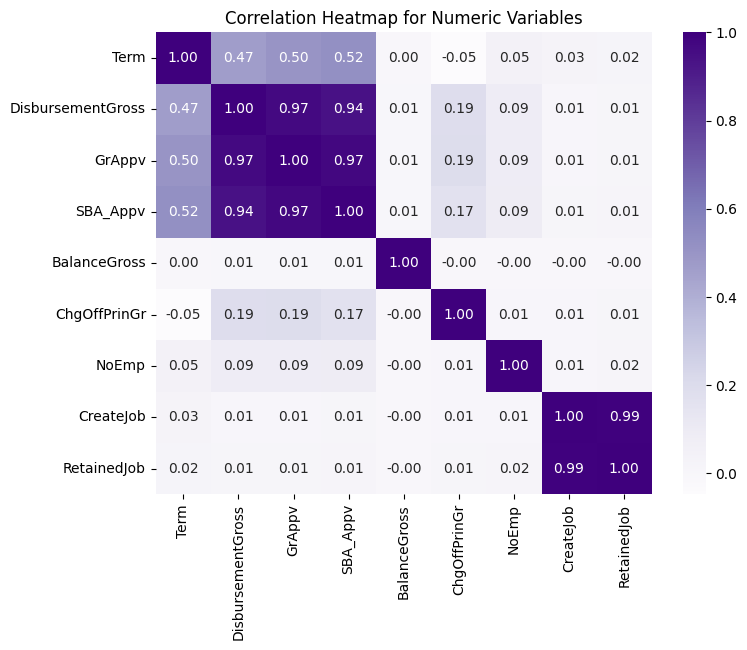

In [77]:
# Plotting the correlation heatmap for numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Purples', fmt=".2f")
plt.title("Correlation Heatmap for Numeric Variables")
plt.savefig("numeric_correlation_heatmap.png", transparent=True, dpi=300)
plt.show()

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 4.2.1 Analysis of Categorical Variable Correlations

In this section, we will explore the relationship between two categorical variables using a **contingency table**.  
A contingency table helps visualize the joint distribution of two variables by displaying their frequency counts. It is often used to identify potential associations between the variables.

We will:  
1. **Build a contingency table** to get an overview of how the categories are distributed.  
2. **Visualize this relationship** using a bar chart (stacked or grouped).  
3. **Perform a statistical test** (such as the Chi-square test) to check if the variables are independent.  


In [87]:
def bivariate_categorical_distribution_graph(df, col, target='MIS_Status', stacked=True):
    """
    Plots the joint distribution of two categorical variables in the DataFrame using Seaborn.
    
    Parameters:
    - df: pandas DataFrame
    - col: First categorical variable
    - targuet: Second categorical variable
    - stacked: Boolean, if True creates a stacked bar chart, otherwise grouped
    """
    count_table = df.groupby([col, target]).size().reset_index(name='Count')
    
    plt.figure(figsize=(10, 5))
    
    if stacked:
        # Stacked bar plot
        pivot_table = count_table.pivot(index=col, columns=target, values='Count').fillna(0)
        pivot_table.plot(kind='bar', stacked=True, color=['red', '#9370DB'], figsize=(10, 5))
        plt.legend(title=target, fontsize=8)
    else:
        # Grouped bar plot
        sns.barplot(data=count_table, x=col, y='Count', hue=target, palette=['red', '#9370DB'], dodge=True)
        plt.legend(title=target, fontsize=8)

    plt.title(f'Distribution of {col} by {target}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

<Figure size 1000x500 with 0 Axes>

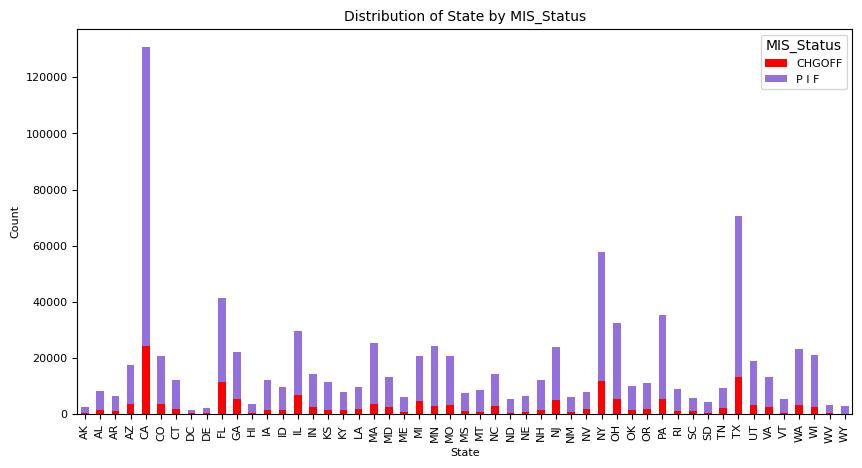

<Figure size 1000x500 with 0 Axes>

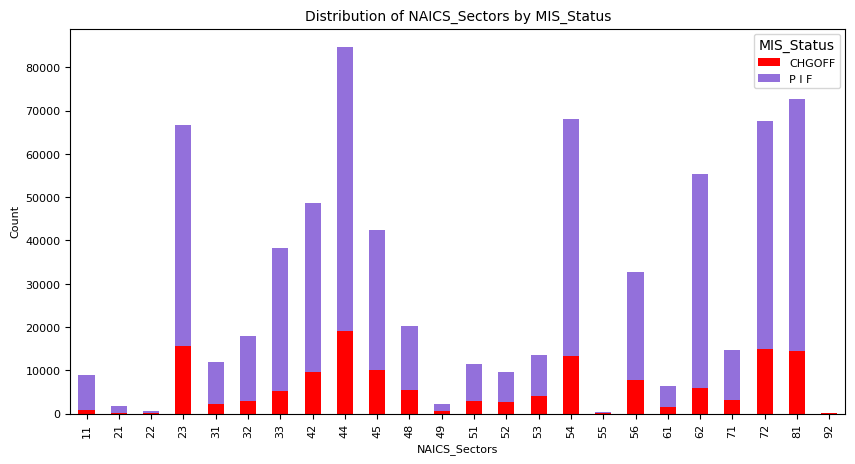

<Figure size 1000x500 with 0 Axes>

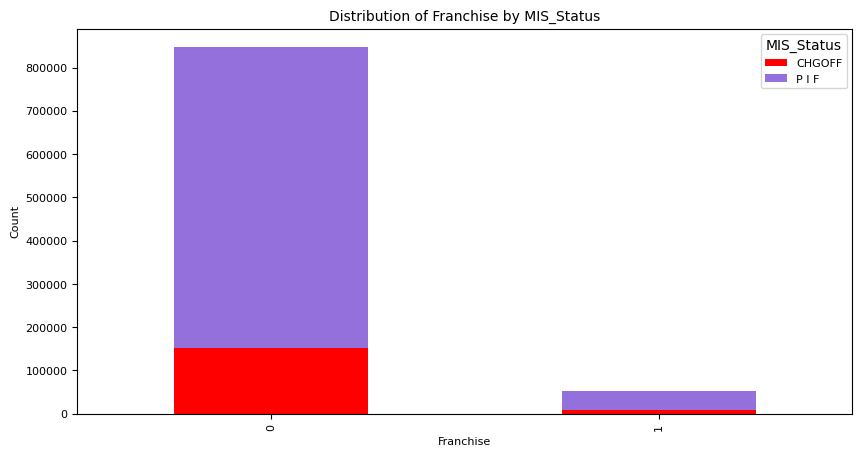

<Figure size 1000x500 with 0 Axes>

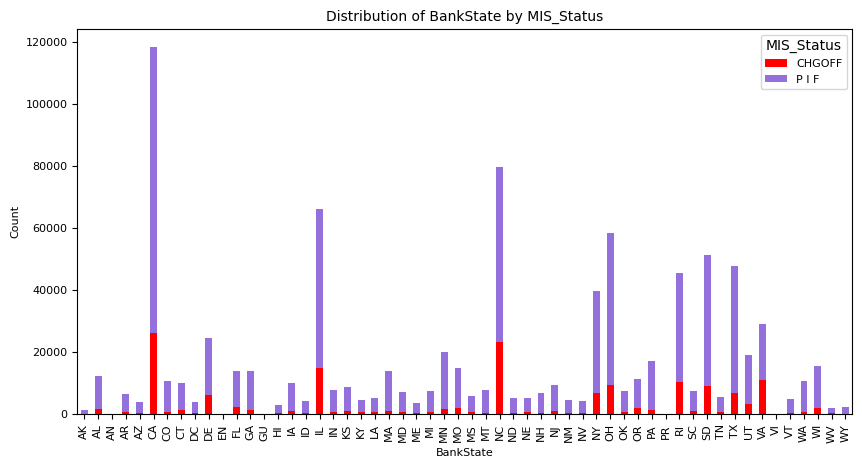

<Figure size 1000x500 with 0 Axes>

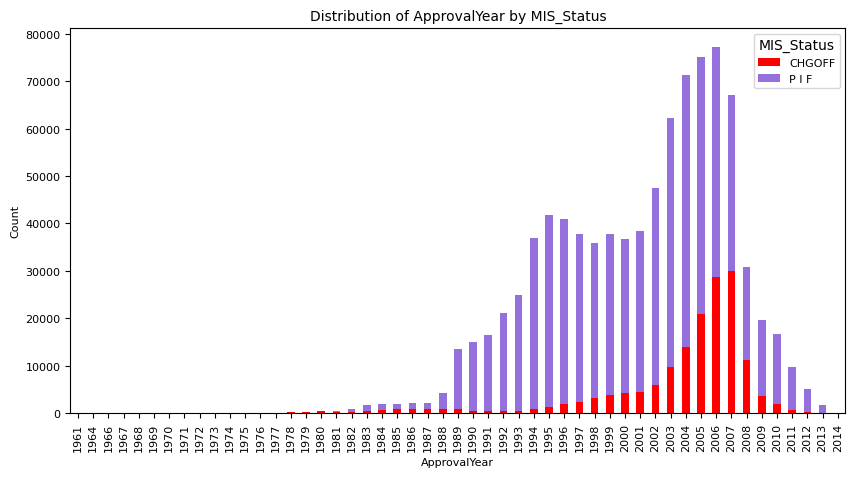

<Figure size 1000x500 with 0 Axes>

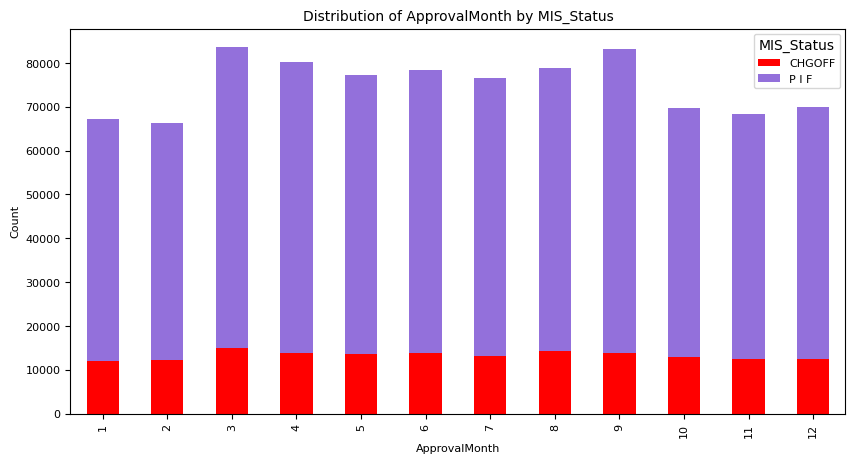

<Figure size 1000x500 with 0 Axes>

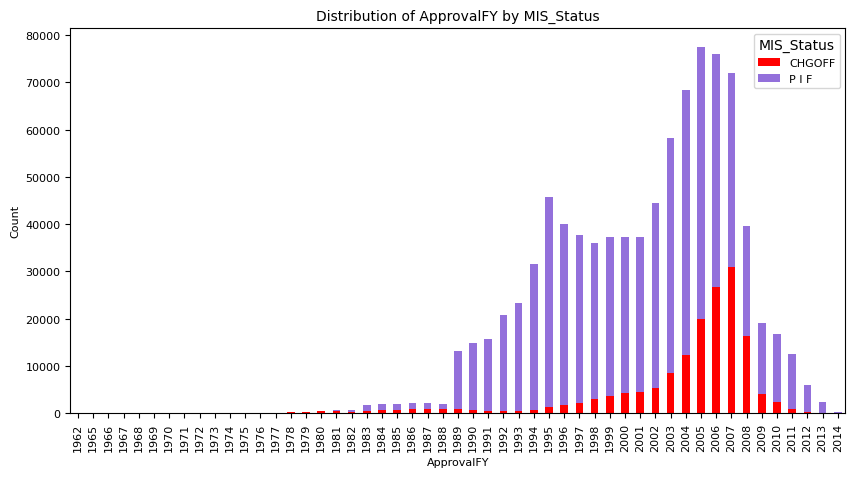

<Figure size 1000x500 with 0 Axes>

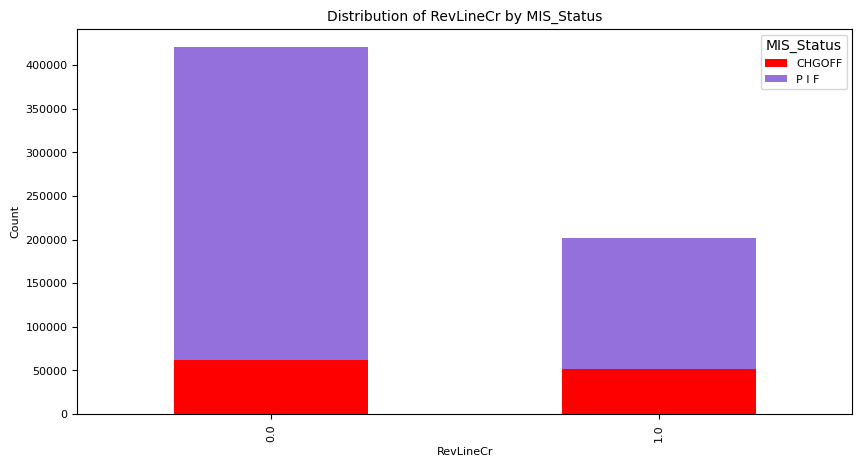

<Figure size 1000x500 with 0 Axes>

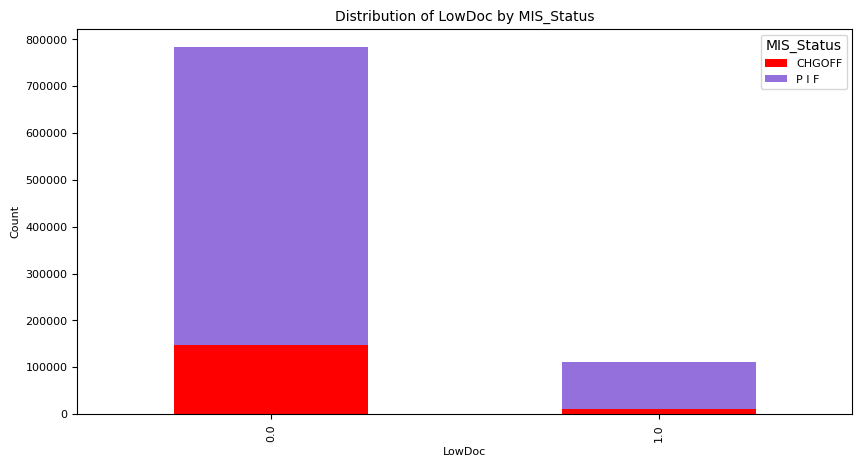

<Figure size 1000x500 with 0 Axes>

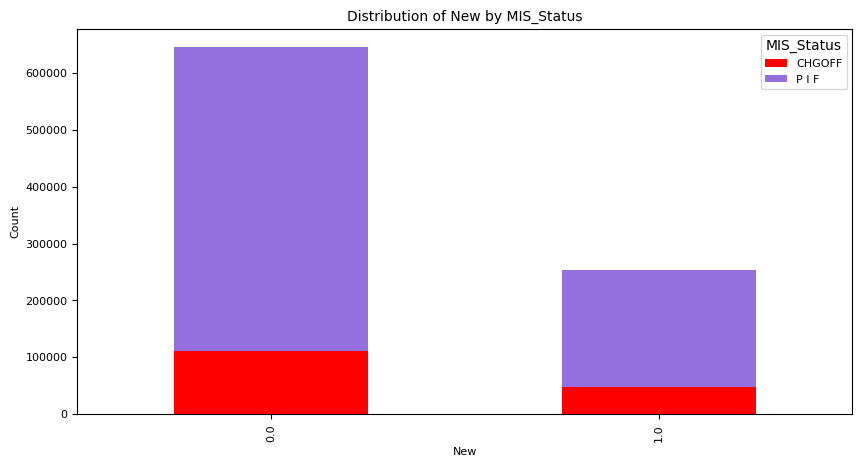

<Figure size 1000x500 with 0 Axes>

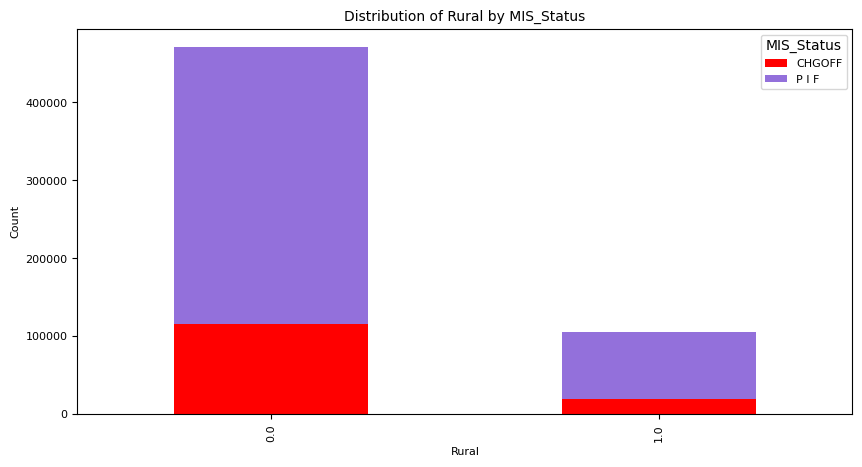

In [88]:
for col in categorical_columns:
    if col == 'MIS_Status':
        pass
    else:
        bivariate_categorical_distribution_graph(df, col)

In [80]:
# Creating contingency tables for analysis
def print_contingency_tables(df, categorical_columns):
    """
    Creates and prints contingency tables for pairs of categorical variables in the DataFrame.
    """
    for i, col1 in enumerate(categorical_columns):
        for j, col2 in enumerate(categorical_columns):
            if i < j:  # Ensuring each pair is processed only once
                # Creating the contingency table
                contingency_table = pd.crosstab(df[col1], df[col2])
                # Depending on the analysis (we can normalize by total count/row or column, we decided to go by row)
                # Calculate percentages (normalize by total count)
                # contingency_table_percentage = contingency_table / contingency_table.sum().sum() * 100  # Total normalization
                contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100  # Row-wise normalization
                # contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100  # Column-wise normalization

                # Combine counts and percentages into a single table
                combined_table = contingency_table.astype(str) + " (" + contingency_table_percentage.round(2).astype(str) + "%)"

                # Printing our combined table
                print(f"Contingency Table: {col1} vs {col2}")
                print(combined_table)
                print("-" * 40)  # Adding a line to separate our tables


In [81]:
# Call the function to plot contingency tables
print_contingency_tables(df, categorical_columns)

Contingency Table: State vs NAICS_Sectors
NAICS_Sectors             11           21          22             23  \
State                                                                  
AK               123 (8.47%)   17 (1.17%)   1 (0.07%)   150 (10.32%)   
AL               328 (5.83%)    11 (0.2%)   5 (0.09%)    468 (8.32%)   
AR               421 (9.51%)   18 (0.41%)   8 (0.18%)    314 (7.09%)   
AZ                36 (0.25%)    14 (0.1%)  23 (0.16%)  1678 (11.77%)   
CA               346 (0.34%)   81 (0.08%)  76 (0.07%)   8341 (8.18%)   
CO                77 (0.48%)   54 (0.34%)  14 (0.09%)  2087 (13.09%)   
CT                 29 (0.3%)    10 (0.1%)   8 (0.08%)  1152 (11.77%)   
DC                 3 (0.22%)     0 (0.0%)    0 (0.0%)     52 (3.87%)   
DE                28 (1.59%)    4 (0.23%)   3 (0.17%)    153 (8.68%)   
FL                91 (0.26%)   16 (0.05%)  31 (0.09%)   2704 (7.82%)   
GA               358 (2.08%)    9 (0.05%)   6 (0.03%)   1084 (6.31%)   
HI                21 (

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> Association Analysis with Cramér’s V

This analysis measures the association between two categorical variables using the **Chi-Square test** and **Cramér’s V statistic**. The **Chi-Square test** assesses whether the variables are independent, while **Cramér’s V** (\( V = \sqrt{\frac{\chi^2}{n \times ( \min(k - 1, r - 1) )}} \)) quantifies the strength of the relationship on a scale from 0 (no association) to 1 (strong association).  

A **p-value** below **0.05** indicates a statistically significant association. Cramér’s V is typically interpreted as **weak (\(<0.3\))**, **moderate (\(0.3 - 0.5\))**, or **strong (\(>0.5\))**. This analysis helps uncover meaningful relationships between categorical variables, supporting data exploration and decision-making. 

| Column Name           | Description |
|-----------------------|-------------|
| **Chi2**             | The **Chi-Square statistic** (\(\chi^2\)), which quantifies the difference between observed and expected frequencies in a contingency table. A higher value indicates a stronger deviation from independence. |
| **Degrees of Freedom** | The **degrees of freedom (dof)**, calculated as \((r - 1) \times (c - 1)\), where \(r\) and \(c\) are the number of categories in each variable. Les **degrés de liberté (dof)**, calculés comme \((r - 1) \times (c - 1)\), où \(r\) et \(c\) sont le nombre de catégories dans chaque variable, affectent l'interprétation de la statistique du Chi-carré. En général, plus les degrés de liberté sont élevés, plus la distribution du Chi-carré s'étale. Cela signifie que pour un même niveau de confiance, une valeur de Chi-carré plus élevée sera nécessaire pour rejeter l'hypothèse nulle. - **Degrés élevés** : La distribution du Chi-carré est plus étalée, ce qui nécessite une valeur de Chi-carré plus élevée pour atteindre un niveau de signification donné. - **Degrés faibles** : La distribution du Chi-carré est plus concentrée, ce qui signifie qu'une valeur de Chi-carré plus faible peut être suffisante pour atteindre un niveau de signification donné.  |
| **P-value**          | The **probability value** indicating the likelihood that the observed association is due to chance. A **p-value < 0.05** suggests a statistically significant relationship. |
| **Significance**     | A categorical interpretation of the p-value: typically "Significant" if \( p < 0.05 \) and "Not Significant" otherwise. |
| **Cramér's V**       | A **measure of association strength** between two categorical variables, ranging from **0 (no association)** to **1 (strong association)**. |
| **Strength**         | A qualitative assessment of **Cramér’s V**, often categorized as **weak (<0.3)**, **moderate (0.3-0.5)**, or **strong (>0.5)**. |



In [82]:
def calculate_chi2_categorical(df, categorical_columns):
    """
    Calculate the Chi-Square test for independence between pairs of categorical variables.
    """
    results = []
    for i, var1 in enumerate(categorical_columns):
        for var2 in categorical_columns[i + 1:]:  # Ensure each pair is tested only once
            # Cross Tabulation
            contingency_table = pd.crosstab(df[var1], df[var2])
            
            # Chi-Square Test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Compute Cramér's V
            n = contingency_table.sum().sum()  # Total observations
            k, r = contingency_table.shape
            cramers_v = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))
            
            # Interpretation of Cramér's V
            if cramers_v < 0.1:
                strength = 'Very weak'
            elif cramers_v < 0.3:
                strength = 'Weak'
            elif cramers_v < 0.5:
                strength = 'Moderate'
            else:
                strength = 'Strong'
            
            # Interpretation of Chi-Square significance
            significance = 'Significant' if p < 0.05 else 'Not significant'
            
            # Add results to the list
            results.append([var1, var2, chi2, dof, p, significance, cramers_v, strength])

    # Create a DataFrame for the results
    chi2_df = pd.DataFrame(results, columns=[
        'Variable 1', 'Variable 2', 'Chi2', 'Degrees of Freedom', 'P-value', 'Significance',
        'Cramér\'s V', 'Strength'
    ])

    return chi2_df


In [83]:
# Calculate Chi-Square test for independence
chi2_results = calculate_chi2_categorical(df, categorical_columns)
chi2_results = chi2_results.sort_values(by="Variable 1" , ascending=False)

# Display the entire DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
chi2_results

,Variable 1,Variable 2,Chi2,Degrees of Freedom,P-value,Significance,Cramér's V,Strength
0,State,NAICS_Sectors,9.790029e+04,1150,0.000000e+00,Significant,0.078135,Very weak
1,State,Franchise,5.874749e+03,50,0.000000e+00,Significant,0.080831,Very weak
2,State,BankState,1.836504e+07,2750,0.000000e+00,Significant,0.639695,Strong
3,State,ApprovalYear,6.949903e+04,2450,0.000000e+00,Significant,0.039717,Very weak
4,State,ApprovalMonth,2.165012e+03,550,7.395286e-190,Significant,0.014795,Very weak
5,State,ApprovalFY,6.975367e+04,2450,0.000000e+00,Significant,0.039790,Very weak
6,State,MIS_Status,1.079997e+04,50,0.000000e+00,Significant,0.109596,Weak
7,State,RevLineCr,3.503134e+04,50,0.000000e+00,Significant,0.237382,Weak
8,State,LowDoc,2.851199e+04,50,0.000000e+00,Significant,0.178671,Weak
9,State,New,1.967631e+04,50,0.000000e+00,Significant,0.148026,Weak


In [84]:
def cramers_v_matrix(df, categorical_columns):
    """
    Compute Cramér’s V matrix for categorical variables.
    """
    n = len(categorical_columns)
    cramers_v_matrix = np.zeros((n, n))  # Initialize an n x n matrix
    
    for i in range(n):
        for j in range(i, n):  # Avoid duplicates by testing each pair only once
            if i == j:
                cramers_v_matrix[i, j] = 1.0  # A variable with itself has a correlation of 1
            else:
                # Contingency table
                contingency_table = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
                
                # Chi-square test calculation
                chi2, _, _, expected = chi2_contingency(contingency_table)
                
                # Cramér's V calculation
                n_obs = contingency_table.sum().sum()
                k, r = contingency_table.shape
                cramers_v = np.sqrt(chi2 / (n_obs * (min(k - 1, r - 1))))
                
                # Store the correlation value symmetrically
                cramers_v_matrix[i, j] = cramers_v
                cramers_v_matrix[j, i] = cramers_v
    
    return pd.DataFrame(cramers_v_matrix, index=categorical_columns, columns=categorical_columns)

# Compute the Cramér’s V matrix
cramers_v_df = cramers_v_matrix(df, categorical_columns)
cramers_v_df

,State,NAICS_Sectors,Franchise,BankState,ApprovalYear,ApprovalMonth,ApprovalFY,MIS_Status,RevLineCr,LowDoc,New,Rural
State,1.000000,0.078135,0.080831,0.639695,0.039717,0.014795,0.039790,0.109596,0.237382,0.178671,0.148026,0.325647
NAICS_Sectors,0.078135,1.000000,0.281971,0.080877,0.055252,0.012092,0.055514,0.110812,0.197164,0.091851,0.175686,0.153513
Franchise,0.080831,0.281971,1.000000,0.101155,0.060513,0.003668,0.061059,0.016044,0.094434,0.028263,0.142295,0.002126
BankState,0.639695,0.080877,0.101155,1.000000,0.067906,0.017786,0.068612,0.198349,0.442423,0.235118,0.154822,0.307951
ApprovalYear,0.039717,0.055252,0.060513,0.067906,1.000000,0.053675,0.791663,0.364193,0.570618,0.416660,0.095810,0.077270
ApprovalMonth,0.014795,0.012092,0.003668,0.017786,0.053675,1.000000,0.049254,0.014067,0.028684,0.015577,0.010255,0.025110
ApprovalFY,0.039790,0.055514,0.061059,0.068612,0.791663,0.049254,1.000000,0.366011,0.569295,0.428214,0.097418,0.082078
MIS_Status,0.109596,0.110812,0.016044,0.198349,0.364193,0.014067,0.366011,1.000000,0.130875,0.084238,0.019309,0.051991
RevLineCr,0.237382,0.197164,0.094434,0.442423,0.570618,0.028684,0.569295,0.130875,1.000000,0.221792,0.091741,0.109891
LowDoc,0.178671,0.091851,0.028263,0.235118,0.416660,0.015577,0.428214,0.084238,0.221792,1.000000,0.162614,0.116954


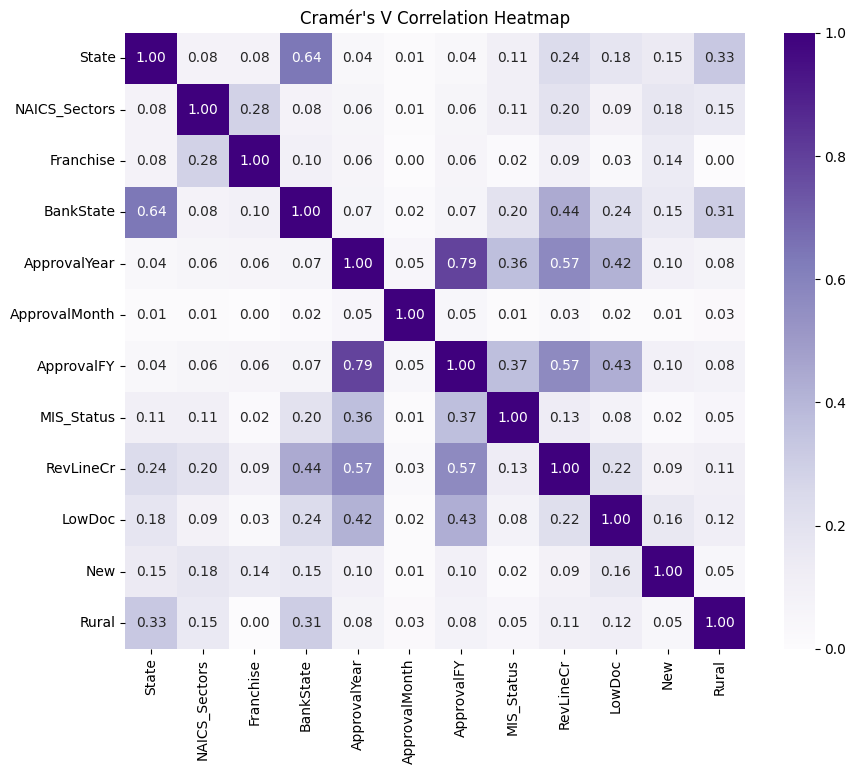

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df, annot=True, cmap='Purples', vmin=0, vmax=1, fmt=".2f")
plt.title("Cramér's V Correlation Heatmap")
plt.savefig("cramers_v_heatmap.png", transparent=True, dpi=300)
plt.show()

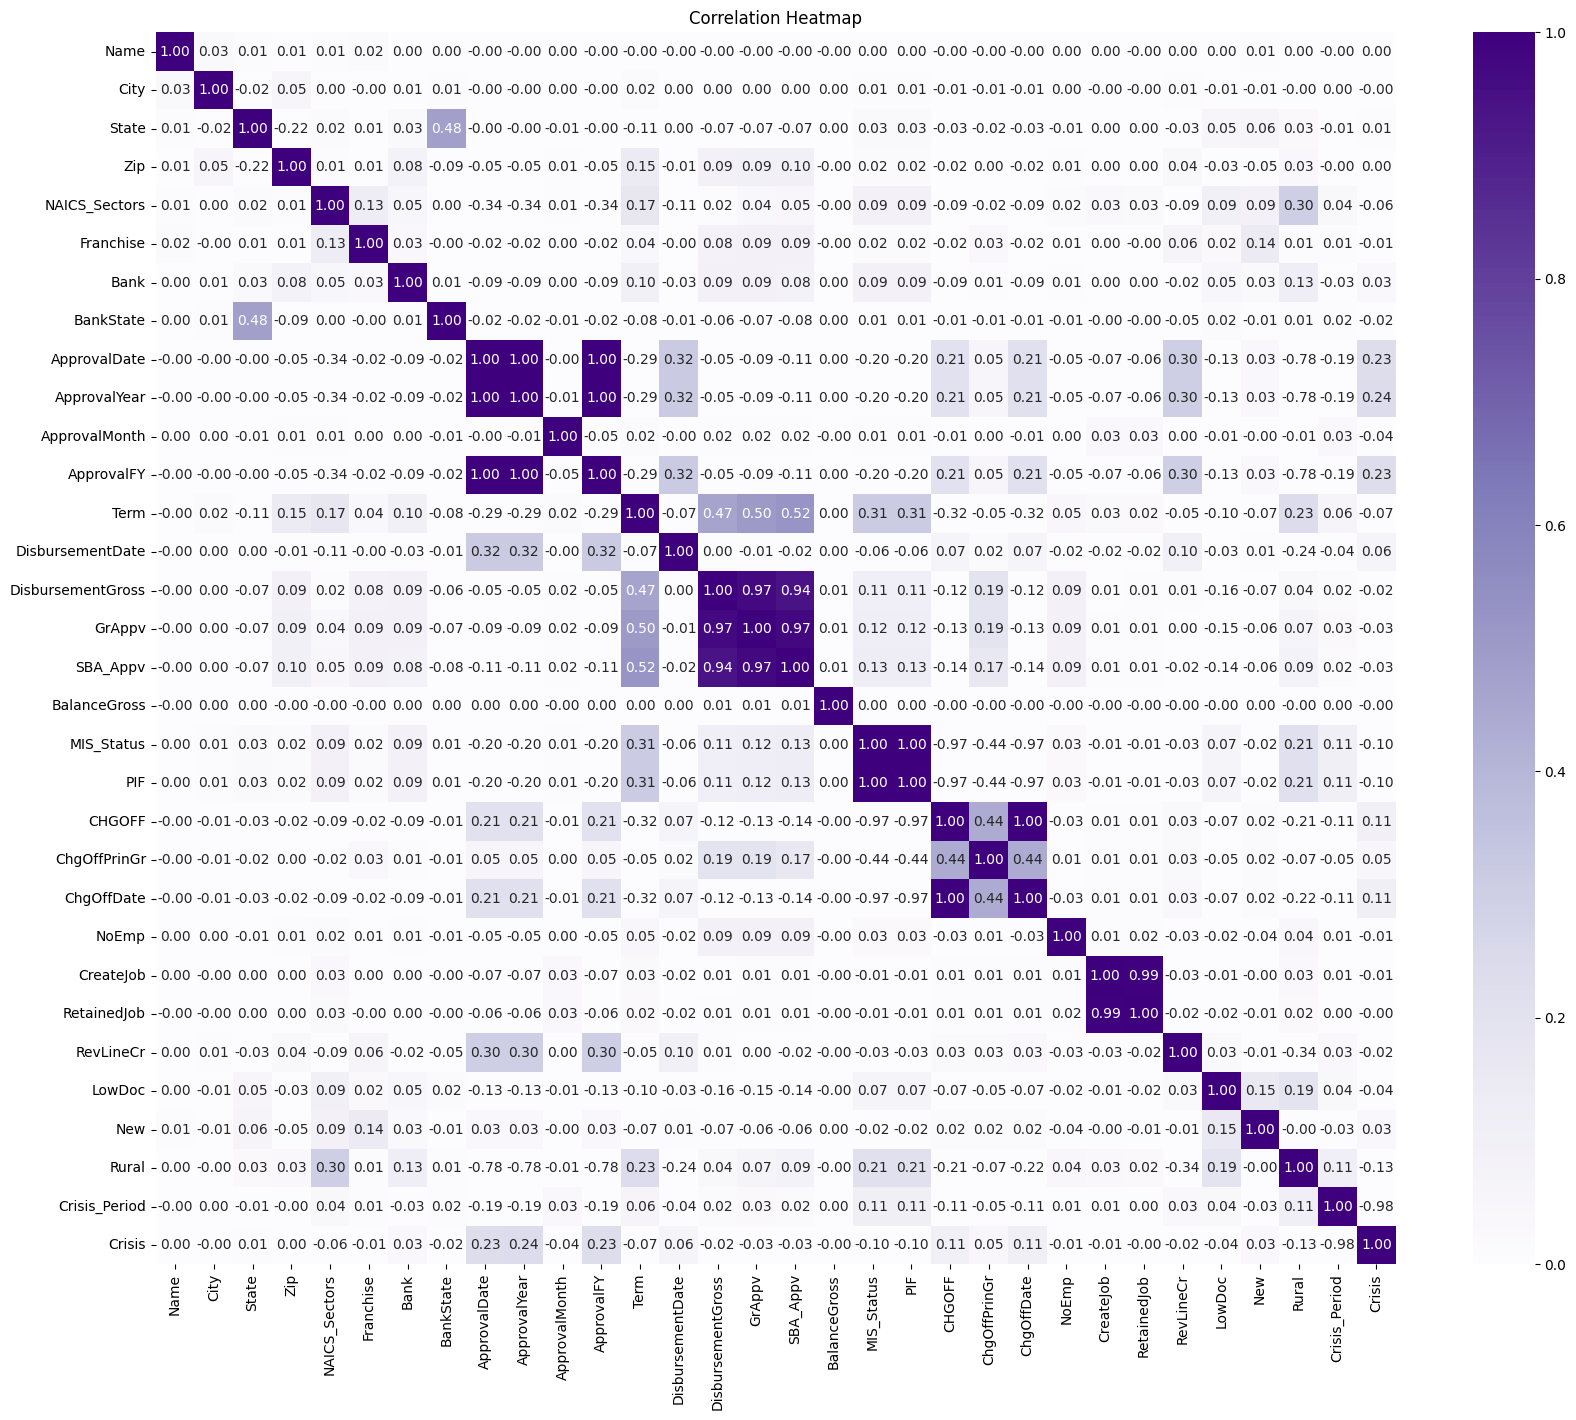

In [86]:
# List of columns to exclude (e.g., identifiers, names, etc.)
excluded_cols = ['PIF', 'CHGOFF']

# Select categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Encode categorical columns except the excluded ones
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    if col not in excluded_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')  # Convert to numeric

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", vmin=0, vmax=1, fmt=".2f")

plt.title("Correlation Heatmap") 
plt.show()



# <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> 5. Conclusions

The findings from this exploratory data analysis (EDA) will provide key insights for developing predictive models to determine whether an SBA loan will be approved or denied. Insights on the influence of financial, demographic, and loan-related factors will guide feature selection and preprocessing steps.

This exploratory data analysis (EDA) has provided valuable insights into the factors influencing the approval or denial of SBA loans. By examining demographic, financial, and loan-related variables, we identified key trends and relationships that will inform predictive modeling and decision-making.

1. **Univariate Analysis**:
   - The distribution of numeric variables revealed significant patterns. For instance, the average loan term was **120 months**, with a median of **84 months**, indicating a skew towards shorter-term loans.
   - Loan amounts varied widely, with a mean disbursement of **$150,000** and a maximum of over **$5 million**, highlighting the diversity in loan sizes.
   - Among categorical variables, **MIS_Status** (loan status) showed that approximately **70% of loans were paid in full (PIF)**, while **30% were charged off (CHGOFF)**, indicating a notable default rate.

2. **Bivariate Analysis**:
   - A strong relationship was observed between loan amounts and loan status. Loans exceeding **$500,000** had a significantly higher likelihood of being charged off, suggesting that larger loans carry greater risk.
   - Collateralized loans showed a **20% higher approval rate** compared to non-collateralized loans, emphasizing the importance of guarantees in loan decisions.
   - Correlation analysis revealed moderate to strong relationships between variables such as **DisbursementGross** and **SBA_Appv** (correlation coefficient: **0.85**), indicating that SBA guarantees are closely tied to loan disbursements.

3. **Categorical Variable Analysis**:
   - Chi-square tests and Cramér’s V analysis highlighted significant associations between variables. For example, the relationship between **NAICS_Sectors** (industry sectors) and **MIS_Status** was statistically significant (p-value < 0.05), certain sectors, such as manufacturing, showing higher default rates.
   - Cramér’s V values ranged from **0.2 to 0.4**, indicating weak to moderate associations between categorical variables like **ApprovalFY** (fiscal year) and loan status.

4. **Missing Data**:
   - Missing values were concentrated in variables like **ChgOffDate** and **RetainedJob**, with up to **15% missingness**. These gaps will need to be addressed through imputation or exclusion to ensure robust modeling.

### <span style='color:rgb(135, 135, 236)'> <span style='font-family:Calibri'> Key Insights and Next Steps

The analysis has uncovered several critical insights:
- Larger loans and higher debt-to-income ratios are associated with increased default risk.
- Collateral and SBA guarantees play a pivotal role in loan approval.
- Industry sector and geographic location significantly influence loan outcomes.

These findings will guide feature selection and preprocessing for predictive modeling. For instance, variables like **DisbursementGross**, **SBA_Appv**, and **NAICS_Sectors** should be prioritized in model development. Additionally, the relationships identified between categorical variables will inform encoding strategies and feature engineering.

In conclusion, this EDA has laid a strong foundation for building predictive models to assess SBA loan approval. By leveraging the insights gained, we can develop accurate and interpretable models to support data-driven decision-making in loan management.